In [2389]:
# Objective is to predict the demand for bikes using relevant inputs from the data set

In [2390]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.graphics.gofplots import qqplot

In [2391]:
# Reading and viewing the data
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2392]:
# Information regarding the data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2393]:
# From the data information it is evident that there are no missing values

# From the data dictionary
# 1) It can be inferred that instant can be dropped as it is just a record number
# 2) dteday can be dropped as information is already present in year and month
# 3) casual and registered can be dropped as they are not available before hand 
bike_data.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)


In [2394]:
# Displaying statistical information of the data
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


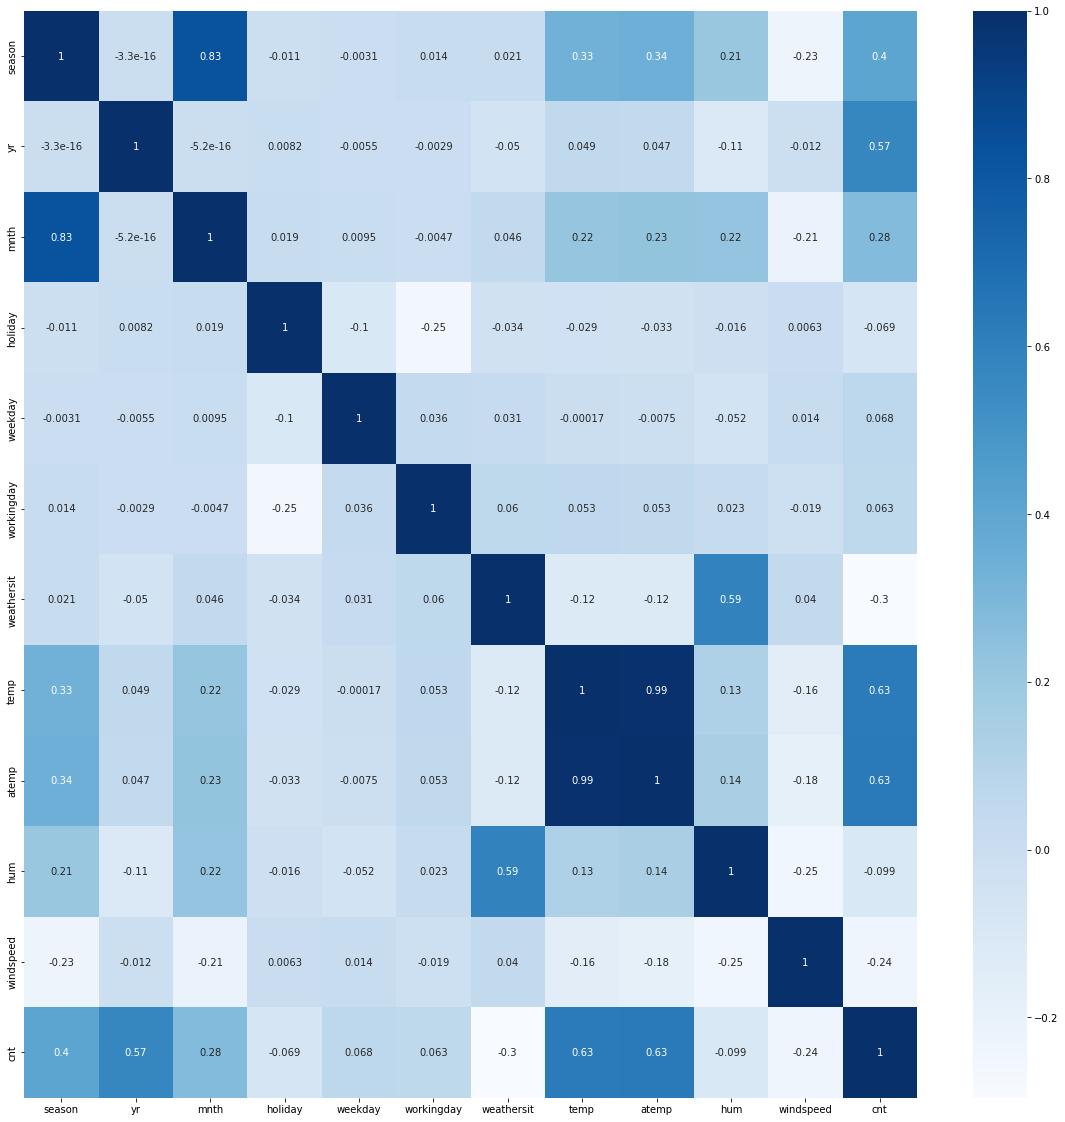

In [2395]:
# Plotting heatmap for variables
corr_mat = bike_data.corr()
plt.figure(figsize=(20,20))
blue_map  = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(corr_mat,cmap=blue_map,annot=True)
plt.show()

In [2396]:
# From the heatmap, it can be inferred that temp and atemp are highly correlated. So one of them can be dropped as they are dependent on each other
# Bikes demand is mostly dependant on atemp,year,season
# Dropping temp as atemp is more relevant because it is the temperature that the user feels 
# It can be seen that even season and month are coorelated as they are dependant i.e you can predict the season from the month of the year
# Retaining season and dropping month as it is highly corelated to the output 
bike_data.drop(["temp","mnth"],axis=1,inplace=True)

In [2397]:
# Listing down the set of variables
# a) Ordered categorical
    # 1) year
    # 2) weekday
ordered_cat = ["year","weekday"] # ordered categorical columns
# b) Unordered categorical
    # 1) holiday
    # 2) working day
    # 3) weathersit
unordered_cat = ["holiday","working day","weathersit"] # unordered categorical columns
# c) Numerical
    # 1) atemp
    # 2) hum
    # 3) windspeed
num_columns = ["atemp","hum","windspeed"] # numerical columns
# d) Cyclic variables
 # 1) season 

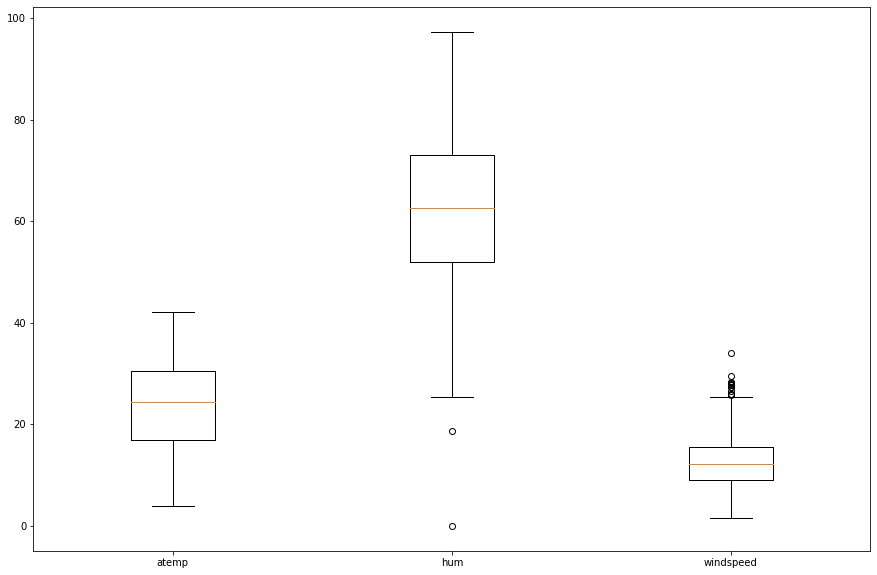

In [2398]:
# Plotting box plot for numerical variables
plt.figure(figsize=(15,10))
plt.boxplot(bike_data[num_columns],labels=num_columns)
plt.show()

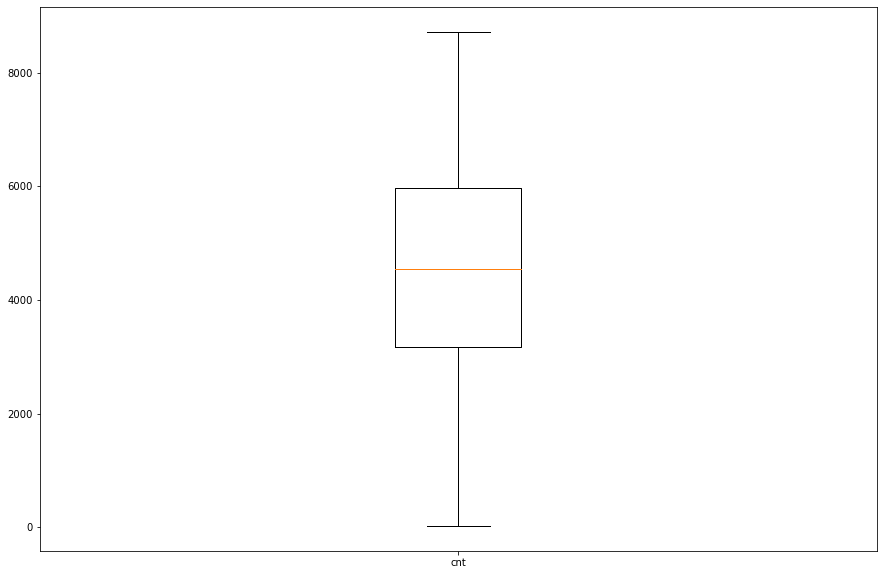

In [2399]:
# Checking for outliers in target variable using box plot
plt.figure(figsize=(15,10))
plt.boxplot(bike_data["cnt"],labels=["cnt"])
plt.show()

In [2400]:
# No outliers are found in the target variable

In [2401]:
# It can be seen that variables hum and windspeed have outliers as per the standard outlier definition
# Checking the number of outliers
quantiles = bike_data[num_columns].quantile([0.25,0.75])
for i in num_columns:
    iqr = quantiles.loc[0.75,i]- quantiles.loc[0.25,i]
    lower_range = quantiles.loc[0.25,i] - 1.5*iqr
    upper_range = quantiles.loc[0.75,i] + 1.5*iqr
    outliers = bike_data[(bike_data[i]<lower_range) | (bike_data[i]>upper_range)][i]
    print("Number of outliers in column ",i," are ",len(outliers))

Number of outliers in column  atemp  are  0
Number of outliers in column  hum  are  2
Number of outliers in column  windspeed  are  13


In [2402]:
# As the number of outliers are significantly less compared to the length of data, so they can be removed
# Removing the outliers
for i in num_columns:
    iqr = quantiles.loc[0.75,i]- quantiles.loc[0.25,i]
    lower_range = quantiles.loc[0.25,i] - 1.5*iqr
    upper_range = quantiles.loc[0.75,i] + 1.5*iqr
    outliers = bike_data[(bike_data[i]<lower_range) | (bike_data[i]>upper_range)][i]
    if len(outliers)>0:
        print("Removing ", len(outliers), " outliers in column ",i)
        bike_data = bike_data[(bike_data[i]>lower_range) & (bike_data[i]<upper_range)]
print("The number of data points after removing outliers are: ",len(bike_data))

Removing  2  outliers in column  hum
Removing  12  outliers in column  windspeed
The number of data points after removing outliers are:  716


In [2403]:
# Plotting pair plot between the variables
# plt.figure(figsize=(20,20))
# sns.pairplot(bike_data)
# plt.show()

In [2404]:
# From the pair plot it can be seen that some kind of positive linear relationship exists between atemp and cnt
# This was also observed from heatmap where the correlation coefficient was 0.63

In [2405]:
# Dealing with categorical variables
#  Ordered catregorical variables are being dealt using ordinal encoding
# In the given data set, ordered categorical variables are already in the form of numbers

In [2406]:
# Dummy encoding for unordered categorical variables
# holiday and working day are already encoded
# Encoding weathersit
weather_enc = pd.get_dummies(bike_data["weathersit"],drop_first=True)
# Renaming the encoded columns for better understanding
weather_enc.rename(columns={2:"Mist",3:"Light_snow_rain"},inplace=True)
bike_data = pd.concat([bike_data,weather_enc],axis=1)
bike_data.drop(["weathersit"],axis=1,inplace=True)
bike_data.head()

,season,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Mist,Light_snow_rain
0,1,0,0,6,0,18.18125,80.5833,10.749882,985,1,0
1,1,0,0,0,0,17.68695,69.6087,16.652113,801,1,0
2,1,0,0,1,1,9.47025,43.7273,16.636703,1349,0,0
3,1,0,0,2,1,10.60610,59.0435,10.739832,1562,0,0
4,1,0,0,3,1,11.46350,43.6957,12.522300,1600,0,0


In [2407]:
# Season is a cyclic variable and the bike sales can be high in a particular season. In order for the model to capture that this has to be encoded via dummy encoding
# Applying dummy encoding on column season to capture the effect of season
season_enc = pd.get_dummies(bike_data["season"],drop_first=True,prefix="Season")
bike_data = pd.concat([bike_data,season_enc],axis=1)
bike_data.drop(["season"],axis=1,inplace=True)
bike_data.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Mist,Light_snow_rain,Season_2,Season_3,Season_4
0,0,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,0,1,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,0,2,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,0,3,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0


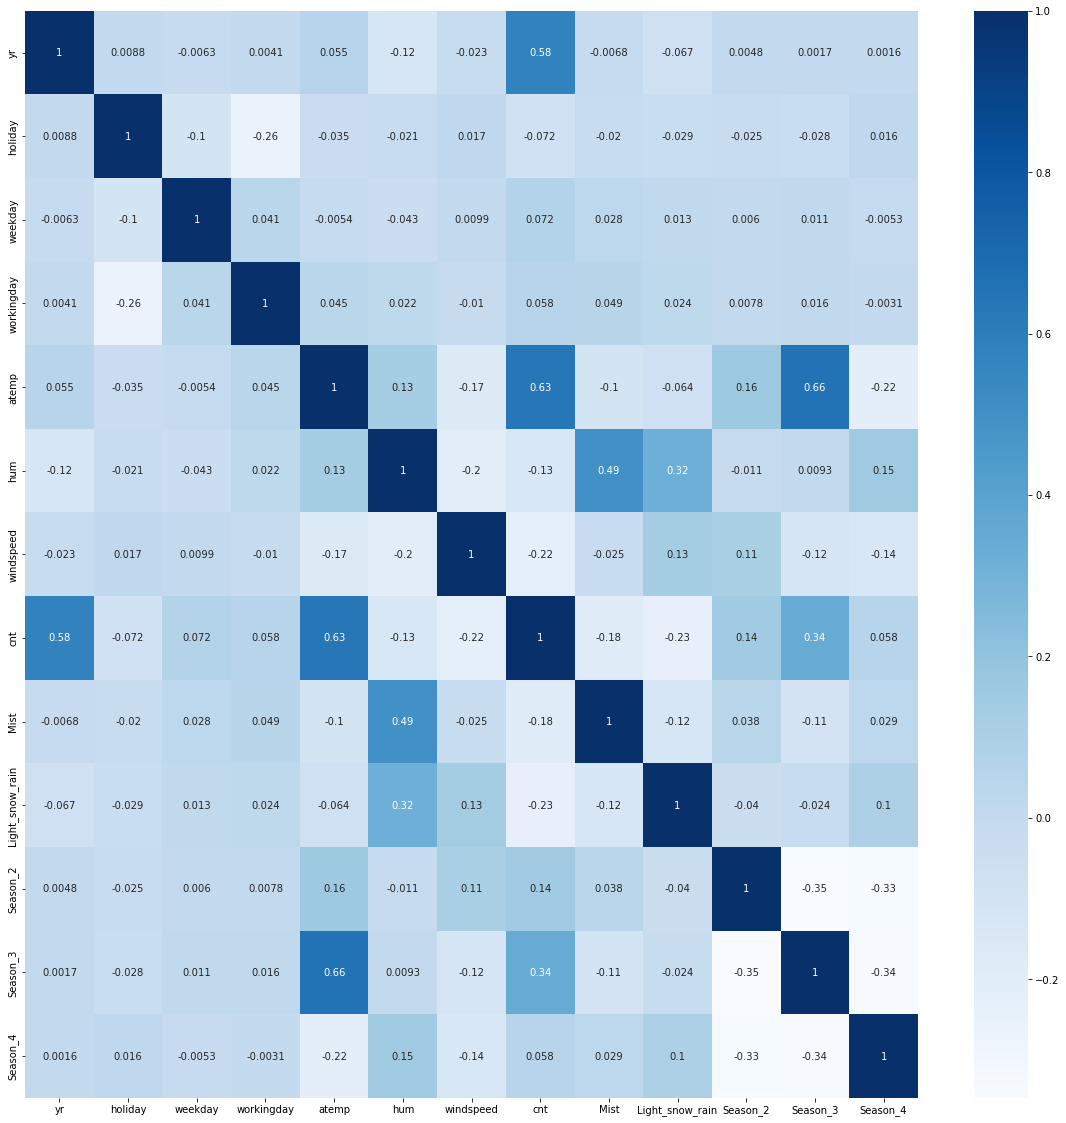

In [2408]:
# Plotting heatmap for variables after dummy encoding
corr_mat = bike_data.corr()
plt.figure(figsize=(20,20))
blue_map  = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(corr_mat,cmap=blue_map,annot=True)
plt.show()

In [2409]:
# Creating a seprate df by adding a constant to inputs for modelling intercept
bike_data["constant"] = 1
bike_data.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Mist,Light_snow_rain,Season_2,Season_3,Season_4,constant
0,0,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,1
1,0,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,1
2,0,0,1,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,1
3,0,0,2,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,1
4,0,0,3,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1


In [2410]:
# Splitting is done before scaling to avoid data leakage
# Splitting the data for training. Using 70 % data for training and 30 % data for testing
X,y = bike_data.drop(("cnt"),axis=1),bike_data["cnt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2411]:
# Linear regression is independant of feature scaling
# Scaling the data for better interpretation of results
# Scaling the data using min max scaler
feat_scal = ["atemp","hum","windspeed"]
scaler = MinMaxScaler()
X_train[feat_scal] = scaler.fit_transform(X_train[feat_scal])


C:\Users\kvc06\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [2412]:
# Using sklearn RFE for finding out 6 important features
lin_mod = LinearRegression() 
rfe = RFE(lin_mod,12)
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

C:\Users\kvc06\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mist', True, 1),
 ('Light_snow_rain', True, 1),
 ('Season_2', True, 1),
 ('Season_3', True, 1),
 ('Season_4', True, 1),
 ('constant', False, 2)]

In [2413]:
rel_feat = list(X_train.columns[rfe.support_]) # list of relevant features
#rel_feat = ["Season_2","Season_3"Season_3","yr","atemp","Light_snow_rain"]
rel_feat.append("constant") # adding constant term for stats module
#rel_feat.remove("atemp")
#rel_feat.remove("mnth")

In [2414]:
# Calculating the vif values to check for co-linearity
vif_data = pd.DataFrame()
vif_data["Features"]=rel_feat
vif_data["values"] =  [variance_inflation_factor(X_train[rel_feat].values, i) for i in range(len(rel_feat))]
print(vif_data)

           Features     values
0                yr   1.031733
1           holiday   1.080930
2           weekday   1.013248
3        workingday   1.081335
4             atemp   3.269678
5               hum   2.028642
6         windspeed   1.194909
7              Mist   1.681771
8   Light_snow_rain   1.396683
9          Season_2   2.806723
10         Season_3   4.553997
11         Season_4   1.941320
12         constant  34.802723


In [2415]:
# The VIF values of all the features is less than 5
# We can ignore constant while VIF calculation as it can obisiously be predicted by other variables
# So the features are not significantly related to each other

In [2416]:
# Using stats module to predict cnt
model = sm.OLS(y_train,X_train[rel_feat])
reg = model.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     182.7
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          9.27e-172
Time:                        23:30:56   Log-Likelihood:                -4074.0
No. Observations:                 501   AIC:                             8174.
Df Residuals:                     488   BIC:                             8229.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
yr               1980.3561     75.702     26.160      0.000    1831.614    2129.098
holiday          -517.7851    220.269     -2.351      0.019    -950.577     -84.993
weekday            65.6560     18.415      3.565      0.000      29.474     101.838
workingday        201.1268     82.052      2.451      0.015      39.908     362.345
atemp            3935.5409    315.567     12.471      0.000    3315.503    4555.579
hum              -844.2932    270.360     -3.123      0.002   -1375.506    -313.081
windspeed        -704.5677    199.103     -3.539      0.000   -1095.773    -313.362
Mist             -488.9669    103.279     -4.734      0.000    -691.893    -286.041
Light_snow_rain -2173.5234    287.931     -7.549      0.000   -2739.261   -1607.786
Season_2         1312.6609    141.672      9.265      0.000    1034.298    1591.023
Season_3         1186.9550    181.809      6.529      0.000     829.730    1544.179
Season_4         1625.5310    120.930     13.442      0.000    1387.923    1863.139
constant         1104.8770    219.762      5.028      0.000     673.080    1536.674
==============================================================================
Omnibus:                       64.534   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.897
Skew:                          -0.744   Prob(JB):                     4.59e-28
Kurtosis:                       4.954   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2417]:
# The  probability of t score and f score is very almost 0
# So we can say that the features are significant

In [2418]:
# Predicting on the train set for error evaluation
y_train_pred = reg.predict(X_train[rel_feat])

C:\Users\kvc06\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


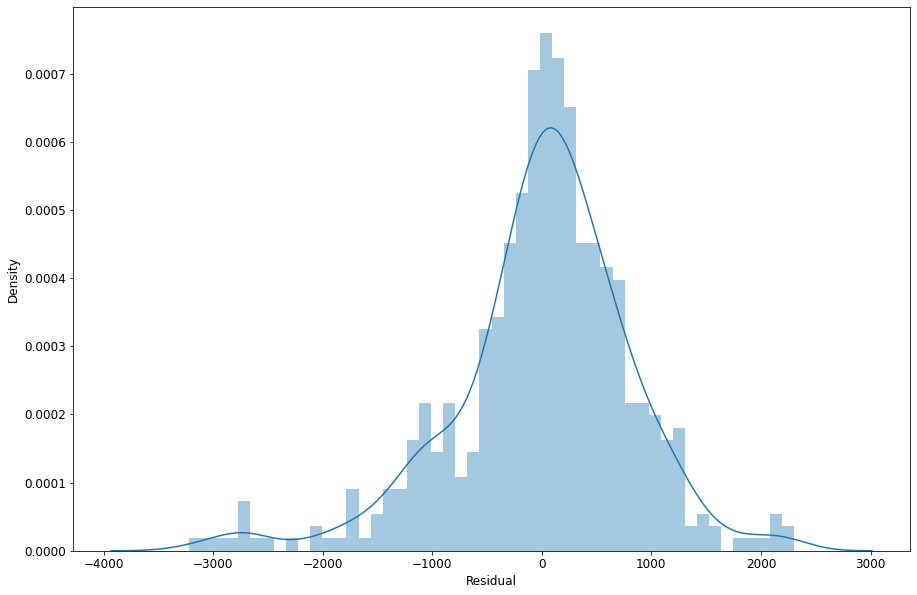

In [2419]:
# Plotting distribution of residuals
plt.figure(figsize=(15,10))
sns.distplot(y_train-y_train_pred,bins=50)
plt.xlabel("Residual",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

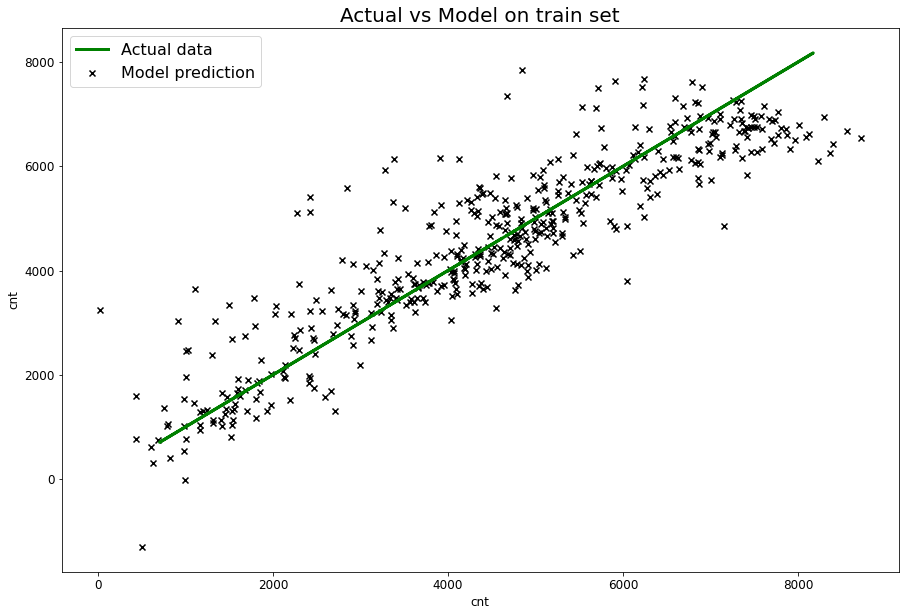

In [2420]:
plt.figure(figsize=(15,10))
plt.plot(y_test,y_test,linewidth=3,color="green")
plt.scatter(y_train,y_train_pred,marker="x",color="black")
plt.legend(("Actual data","Model prediction"),fontsize=16)
plt.title("Actual vs Model on train set",fontsize=20)
plt.xlabel("cnt",fontsize=12)
plt.ylabel("cnt",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [2421]:
# From the above plot it can be seen that the residuals follow a normal distribution with mean centered around 0
# From this we can conclude that the linear regression assumptions are valid

In [2422]:
# r2 score on the test set
X_test[feat_scal] = scaler.transform(X_test[feat_scal])
y_test_pred = reg.predict(X_test[rel_feat])
r2_score(y_test,y_test_pred)

C:\Users\kvc06\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


0.8328206924242197

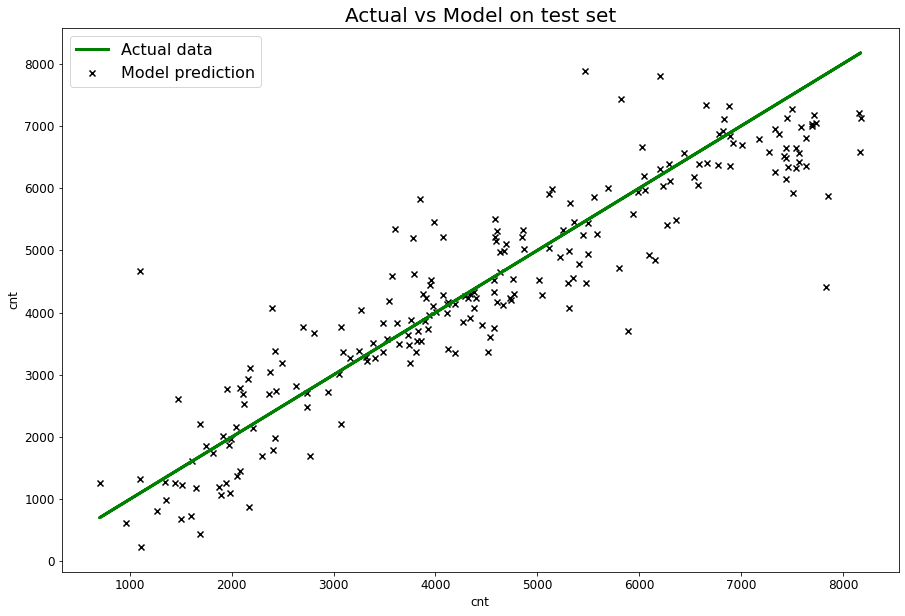

In [2423]:
# Plotting graph between model predictions and the actual values on test set
plt.figure(figsize=(15,10))
plt.plot(y_test,y_test,linewidth=3,color="green")
plt.scatter(y_test,y_test_pred,marker="x",color="black")
plt.legend(("Actual data","Model prediction"),fontsize=16)
plt.xlabel("cnt",fontsize=12)
plt.ylabel("cnt",fontsize=12)
plt.title("Actual vs Model on test set",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [2424]:
# From the above graph it can be seen that the preditions are almost randomly distributed wrt actual data


In [2425]:
# Conclusion
# We were able to explain about 77% of variance using only 50 % of available data
# Important features in order: 
# 1) atemp - Feeling temperature - More the feeling temperature more is the demand for bikes 
# 2) yr - The demand for bikes is increasing year on year - The company should prepare themselves to meet higher demand of bikes
# 3) Light_snow_rain - Light rain or snow has a negtive impact on the demand of bikes - The company can focus on maintainence of existing bikes during such weather conditions
# 4) hum - Higher humidity leads to less demand for bikes
# 5) Season - The demand for bikes is more in summer and winter with winter demand almost double than that of the summer demand


In [2426]:
# Further improvements to the model can be done by
# 1) Using a non linear model for higher demands as from the plot it can be seen that the model is under predicting for the values of demand > 7000
# 2) Using more number of data points